In [17]:
import pandas as pd

# Extracting enrolment division info and turnout data from CSV

In [18]:
df = pd.read_csv('Resources/HouseVotesCountedByDivisionDownload-20499.csv', header=1)

In [19]:
df.head()

,DivisionID,DivisionNm,StateAb,Enrolment,OrdinaryVotes,AbsentVotes,ProvisionalVotes,PrePollVotes,PostalVotes,TotalVotes,TotalPercentage
0,179,Adelaide,SA,109217,79148,6869,686,3444,8515,98662,90.34
1,197,Aston,VIC,96043,72395,3756,292,3090,9578,89111,92.78
2,198,Ballarat,VIC,110755,87377,3439,783,3118,8451,103168,93.15
3,103,Banks,NSW,104891,81420,4109,469,3395,7095,96488,91.99
4,180,Barker,SA,105600,85870,3019,245,2877,6662,98673,93.44


# Transforming the data to look at the turnout of the 2016 federal election

In [20]:
df.columns

Index(['DivisionID', 'DivisionNm', 'StateAb', 'Enrolment', 'OrdinaryVotes',
       'AbsentVotes', 'ProvisionalVotes', 'PrePollVotes', 'PostalVotes',
       'TotalVotes', 'TotalPercentage'],
      dtype='object')

In [21]:
df.dtypes

DivisionID            int64
DivisionNm           object
StateAb              object
Enrolment             int64
OrdinaryVotes         int64
AbsentVotes           int64
ProvisionalVotes      int64
PrePollVotes          int64
PostalVotes           int64
TotalVotes            int64
TotalPercentage     float64
dtype: object

In [22]:
# checking for duplicates
df['DivisionID'].is_unique

True

In [23]:
len(df)

150

In [24]:
# dropping any na values 
df = df.dropna()
len(df)

150

In [25]:
# columns we want to keep
columns = ['DivisionID', 'Enrolment', 'TotalVotes', 'TotalPercentage']
turnout_df = df[columns]
turnout_df.head()

,DivisionID,Enrolment,TotalVotes,TotalPercentage
0,179,109217,98662,90.34
1,197,96043,89111,92.78
2,198,110755,103168,93.15
3,103,104891,96488,91.99
4,180,105600,98673,93.44


In [26]:
# renaming columns
turnout_df.columns = ['division_id', 'total_enrolled', 'total_votes', 'turnout(%)']
turnout_df.head()

,division_id,total_enrolled,total_votes,turnout(%)
0,179,109217,98662,90.34
1,197,96043,89111,92.78
2,198,110755,103168,93.15
3,103,104891,96488,91.99
4,180,105600,98673,93.44


In [27]:
# rounding turnout percentages to 1 decimal place
turnout_df = turnout_df.round({'turnout(%)': 1})

In [28]:
# set the division_id as index
turnout_df = turnout_df.set_index("division_id")
turnout_df.head()

,total_enrolled,total_votes,turnout(%)
division_id,,,
179,109217,98662,90.3
197,96043,89111,92.8
198,110755,103168,93.2
103,104891,96488,92.0
180,105600,98673,93.4


In [29]:
turnout_df.dtypes

total_enrolled      int64
total_votes         int64
turnout(%)        float64
dtype: object

# Exploratory Analysis

In [30]:
# summary statistics table
turnout_df.describe()

,total_enrolled,total_votes,turnout(%)
count,150.000000,150.000000,150.000000
mean,104477.006667,95080.106667,90.936667
std,10054.470041,9944.933948,2.582632
min,63131.000000,46525.000000,73.700000
25%,100363.250000,90801.750000,89.700000
50%,104874.000000,95891.500000,91.700000
75%,109182.000000,99188.750000,92.600000
max,143231.000000,132310.000000,94.200000


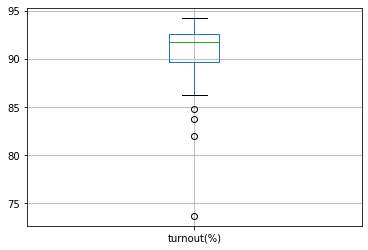

In [31]:
# box plot to investigate turnout data
turnout_df.boxplot(column=['turnout(%)'])

# Export DataFrame to csv

In [32]:
turnout_df.to_csv("04-ouput_election_turnout/election_turnout.csv")